In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
data = pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [6]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34b3a7a90>,
      dtype=object)

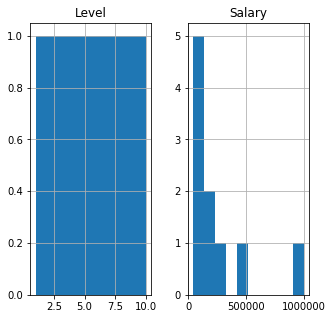

In [7]:
data.hist(figsize = (5,5))

In [4]:
# Divide data into features and label
x_data_set = np.array(data.drop(columns=["Salary", "Position"], axis=0))
y_data_set = np.array(pd.DataFrame(data.Salary))

In [5]:

x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data_set, y_data_set, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data_set = sc_x.fit_transform(x_data_set)
y_data_set = sc_y.fit_transform(y_data_set)

/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Change the kernel
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")  # rbf makes our ML mpdel non linear
regressor.fit(x_data_set, y_data_set)

/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[(6.5)]]))))
y_pred

array([170370.0204065])

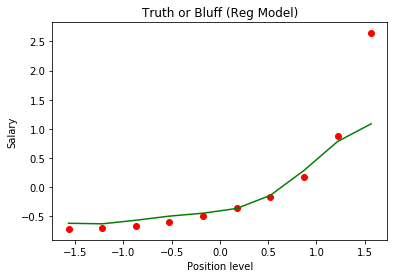

In [9]:
# Visualizing the SVR regression results
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(x_data_set, regressor.predict(x_data_set), color ='green')
plt.title('Truth or Bluff (Reg Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()